In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft
from PIL import Image
import os

In [4]:
myAudio="data/fake-speech-detection/Real-Donald-Trump-Audio/DT2-06.wav"
samplingFreq, mySound = wavfile.read(myAudio)

/opt/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [ ]:
fftArray = fft(mySoundOneChannel)


In [14]:
#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq

#If two channels, then select only one channel
mySoundOneChannel = mySound#[:,0]

#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 1000

#Plot the tone
plt.plot(timeArray, mySoundOneChannel, color='b')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


#Plot frequency content
#We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm

#Get length of mySound object array
mySoundLength = len(mySound)

#Take the Fourier transformation on given sample point 
#fftArray = fft(mySound)
fftArray = fft(mySoundOneChannel)

numUniquePoints = int(numpy.ceil((mySoundLength + 1) / 2))
fftArray = fftArray[0:numUniquePoints]

#FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
#By taking absolute value , we get only real part

fftArray = abs(fftArray)

#Scale the fft array by length of sample points so that magnitude does not depend on
#the length of the signal or on its sampling frequency

fftArray = fftArray / float(mySoundLength)

#FFT has both positive and negative information. Square to get positive only
fftArray = fftArray **2

#Multiply by two (research why?)
#Odd NFFT excludes Nyquist point
if mySoundLength % 2 > 0: #we've got odd number of points in fft
    fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

else: #We've got even number of points in fft
    fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);

#Plot the frequency
plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='B')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.axis('off')
plt.show()

#Get List of element in frequency array
#print freqArray.dtype.type
freqArrayLength = len(freqArray)
print("freqArrayLength =", freqArrayLength)
numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')

#Print FFtarray information
print("fftArray length =", len(fftArray))
numpy.savetxt("fftData.txt", fftArray)

FileNotFoundError: [Errno 2] No such file or directory: 'untitled-2.wav'

In [ ]:
plt.savefig("fig1.png",format="png")

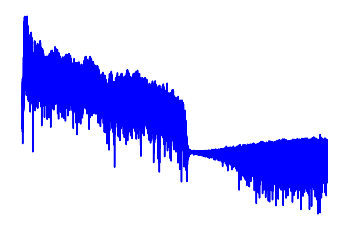

In [12]:
myAudio="data/fake-speech-detection/Real-Donald-Trump-Audio/DT2-06.wav"
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq
if signalDuration>5.0:
    mySound=mySound[:5*samplingFreq]
#If two channels, then select only one channel
mySoundOneChannel = mySound#[:,0]

mySoundLength = len(mySound)

#Take the Fourier transformation on given sample point 
#fftArray = fft(mySound)
fftArray = fft(mySoundOneChannel)
numUniquePoints = int(numpy.ceil((mySoundLength + 1) / 2))
fftArray = fftArray[0:numUniquePoints]
#FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
#By taking absolute value , we get only real part
fftArray = abs(fftArray)
#Scale the fft array by length of sample points so that magnitude does not depend on
#the length of the signal or on its sampling frequency
fftArray = fftArray / float(mySoundLength)
#FFT has both positive and negative information. Square to get positive only
fftArray = fftArray **2
#Multiply by two (research why?)
#Odd NFFT excludes Nyquist point
if mySoundLength % 2 > 0: #we've got odd number of points in fft
    fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

else: #We've got even number of points in fft
    fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);

#Plot the frequency
plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='b')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.axis('off')
plt.savefig('data/fake-speech-detection/Real-Donald-Trump/a.png',format='png')
plt.show()

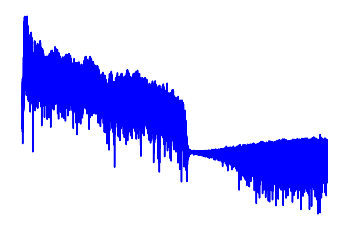

In [8]:
plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='B')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.axis('off')
plt.savefig("data/gg.png")
plt.show()
# plt.savefig("fig1s.png",format="png")

In [ ]:
plt

In [ ]:
plt.show()

In [5]:
path='data/fake-speech-detection/Real-Donald-Trump-Audio'

In [4]:
i=0;

In [11]:
for audiopath in os.listdir('data/fake-speech-detection/Real-Donald-Trump-Audio'):
    print(audiopath)

.ipynb_checkpoints


data			     humpback-identification.ipynb  titanic.ipynb
fake-speech-detection.ipynb  images


DT4-29.wav
DT3-04.wav


ValueError: Unexpected end of file.

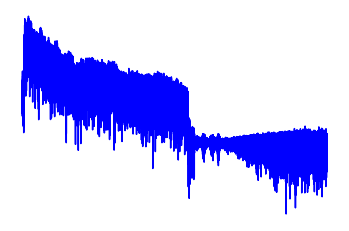

In [34]:
for audiopath in os.listdir('data/fake-speech-detection/Real-Donald-Trump-Audio'):
    if audiopath=='.ipynb_checkpoints':
        continue
    #name=/(.*)\.[^.]+$/
    #i=i+1;
    #Read file and get sampling freq [ usually 44100 Hz ]  and sound object
    print(audiopath)
    samplingFreq, audio = wavfile.read('data/fake-speech-detection/Real-Donald-Trump-Audio/'+audiopath)

    #Check if wave file is 16bit or 32 bit. 24bit is not supported
    mySoundDataType = audio.dtype

    #We can convert our sound array to floating point values ranging from -1 to 1 as follows

    audio = audio / (2.**15)

    #Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

    mySoundShape = audio.shape
    samplePoints = float(audio.shape[0])

    #Get duration of sound file
    signalDuration =  audio.shape[0] / samplingFreq
    
    if signalDuration>5.0:
        audio=audio[:5*samplingFreq]
    
    #If two channels, then select only one channel
    mySoundOneChannel = audio#[:,0]
    mySoundLength = len(audio)

    #Take the Fourier transformation on given sample point 
    #fftArray = fft(mySound)
    fftArray = fft(mySoundOneChannel)

    numUniquePoints = int(numpy.ceil((mySoundLength + 1) / 2))
    fftArray = fftArray[0:numUniquePoints]

    #FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
    #By taking absolute value , we get only real part

    fftArray = abs(fftArray)

    #Scale the fft array by length of sample points so that magnitude does not depend on
    #the length of the signal or on its sampling frequency

    fftArray = fftArray / float(mySoundLength)

    #FFT has both positive and negative information. Square to get positive only
    fftArray = fftArray **2

    #Multiply by two (research why?)
    #Odd NFFT excludes Nyquist point
    if mySoundLength % 2 > 0: #we've got odd number of points in fft
        fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

    else: #We've got even number of points in fft
        fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

    freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);

    
    audioname=str(audiopath)
    #Plot the frequency
    fftArraymin=numpy.min(fftArray[numpy.nonzero(fftArray)])
    fftArray[fftArray==0]=fftArraymin
    plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='b')
    plt.xlabel('Frequency (Khz)')
    plt.ylabel('Power (dB)')
    plt.axis('off')
    plt.savefig('data/fake-speech-detection/Real-Donald-Trump/'+audioname[:-4]+'.png',format='png')
    #plt.show()
#     #Get List of element in frequency array
#     #print freqArray.dtype.type
#     freqArrayLength = len(freqArray)
#     print("freqArrayLength =", freqArrayLength)
#     numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')

#     #Print FFtarray information
#     print("fftArray length =", len(fftArray))
#     numpy.savetxt("fftData.txt", fftArray)